# TÓPICOS DE ECONOMÍA MATEMÁTICA Y COMPUTACIONAL

# EXAMEN FINAL

![](https://dci.pucp.edu.pe/wp-content/uploads/2014/02/Logotipo_colores-290x145.jpg)

**Profesor:** Mg. Luis Chia

### Integrantes: 
- Brisa Javier
- Sonnia Gonzalez
- Diana Ordoñez
- Angella Bruno
- Jorge Castillo

## Modelo

$$
y=\beta_0+\beta X+\epsilon
$$

Donde, $y$ es la cantidad de fallecidos acumulados por regiones debido al Covid-19

Además, las posibles variables explicativas $(x_1,...,x_n)$ puden ser:

$x_1$: Ingreso mensual

$x_2$: Nivel educativo

$x_3$: Edad

$x_4$: Capacidad de estar comunicado

$x_5$: Disponibilidad de seguro

$x_6$: Disponibilidad de DNI

$x_7$: Si padece de algún malestar crónico

$x_8$: Tiempo al centro de salud

$x_9$: Si no contó con dinero para ir al centro de salud

En primer lugar, se procede a instalar los paquetes necesarios para el trabajo. Asimismo, se establece el directorio y se cargan las bases de datos obtenidas de la [Encuesta Nacional de Hogares (ENAHO)](http://iinei.inei.gob.pe/microdatos/) y del [Ministerio de Salud (MINSA)](https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa).

***Paquetes***

In [196]:
import os
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import BayesianRidge, LinearRegression

***Directorio***

In [87]:
os.chdir("C:/Users/Brisa del Cielo/Desktop/2020-1/TOPICOS/TRABAJO FINAL")

***Bases de datos***

In [88]:
modulo3 = pd.read_stata('enaho01a_2020_300.dta') # Módulo 3: Educación

In [89]:
modulo4 = pd.read_stata('enaho01a_2020_400.dta') # Módulo 4: Salud

In [90]:
modulo5 = pd.read_stata('enaho01a_2020_500.dta') # Módulo 5: Ingresos

In [91]:
modulo5['p524a1'].isnull().sum(axis=0) #cantidad de missings

16149

In [92]:
df_fallecidos = pd.read_csv('fallecidos_covid.csv', sep = ',',encoding='latin') # Registro de fallecidos

## Encuesta Nacional de Hogares (ENAHO)

Las variables seleccionadas de la Encuesta Nacional de Hogares (ENAHO) para el modelo son las siguientes:
- p208a: ¿Qué edad tiene? Años cumplidos.  
- p301a: Nivel de educación alcanzado
- p316a1: ¿Teléfono propio? Sí, no.
- p401: ¿Padece alguna enfermedad o malestar crónico? Sí, no o no sabe.
- p401c: ¿Tiene DNI? Sí, no o no sabe.
- p407g2: ¿Cuánto tiempo demora para llegar al establecimiento de salud donde acudió? Número de horas.
- p4091: ¿Cuáles son las razones por las que no acudió a un centro o establecimiento de salud? No tuvo dinero.
- p4191-p4198 : ¿El sistema de prestaciones de salud al que está afiliado actualmente es: ESSALUD, seguro privado, entidad prestadora de salud, seguro de FF.AA., SIS, seguro universitario, seguro escolar privado, otro?    
- p523: Frecuencia de pago (diario,semanal,quincenal y mensual)
- p524a1: Ingreso total (S/)

Establecemos las variables de interes

In [7]:
list(modulo3)

['aÑo',
 'mes',
 'conglome',
 'vivienda',
 'hogar',
 'codperso',
 'ubigeo',
 'dominio',
 'estrato',
 'codinfor',
 'p300n',
 'p300i',
 'p300a',
 'p301a',
 'p301b',
 'p301c',
 'p301d',
 'p301a0',
 'p301a1',
 'p301b0',
 'p301b1',
 'p301b3',
 'p302',
 'p302x',
 'p302a',
 'p302b',
 'p303',
 'p304a',
 'p304b',
 'p304c',
 'p304d',
 'p305',
 'p306',
 'p307',
 'p307a1',
 'p307a2',
 'p307a3',
 'p307a4',
 'p307b1',
 'p307b2',
 'p307b3',
 'p307b4',
 'p308a',
 'p308b',
 'p308c',
 'p308d',
 'p308b1',
 'p308b2',
 'p308b3',
 'p308b4',
 'p308b5',
 'p308c1',
 'p308c2',
 'p310',
 'p310b1',
 'p310c0',
 'p310c1',
 'p310d1',
 'p310d2',
 'p310e0',
 'p310e1',
 'p310e3',
 'p311i',
 'p311n_1',
 'p311n_2',
 'p311n_3',
 'p311n_4',
 'p311n_5',
 'p311n_6',
 'p311n_7',
 'p311n_8',
 'p311_1',
 'p311_2',
 'p311_3',
 'p311_4',
 'p311_5',
 'p311_6',
 'p311_7',
 'p311_8',
 'p311a1_1',
 'p311a1_2',
 'p311a1_3',
 'p311a1_4',
 'p311a1_5',
 'p311a1_6',
 'p311a1_7',
 'p311a1_8',
 'p311a2_1',
 'p311a2_2',
 'p311a2_3',
 'p311a2

In [8]:
list(modulo4)

['aÑo',
 'mes',
 'conglome',
 'vivienda',
 'hogar',
 'codperso',
 'ubigeo',
 'dominio',
 'estrato',
 'codinfor',
 'p400n',
 'p400i',
 'p400a1',
 'p400a2',
 'p400a3',
 'p401c',
 'p401d1',
 'p401d2',
 'p401d3',
 'p401d4',
 'p401d5',
 'p401d6',
 'p401d7',
 'p401d8',
 'p401d9',
 'p401e1',
 'p401e2',
 'p401e3',
 'p401e4',
 'p401e5',
 'p401e6',
 'p401e7',
 'p401f',
 'p401g',
 'p401g1',
 'p401g2',
 'p401h1',
 'p401h2',
 'p401h3',
 'p401h4',
 'p401h5',
 'p401h6',
 'p401',
 'p4021',
 'p4022',
 'p4023',
 'p4024',
 'p4025',
 'p4026',
 'p4031',
 'p4032',
 'p4033',
 'p4034',
 'p4035',
 'p4036',
 'p4037',
 'p4038',
 'p4039',
 'p40310',
 'p40311',
 'p40313',
 'p40314',
 'p4041',
 'p4042',
 'p4043',
 'p4044',
 'p4045',
 'p4046',
 'p4047',
 'p407f1',
 'p407f2',
 'p407f3',
 'p407f4',
 'p407g1',
 'p407g2',
 'p407g3',
 'p407h',
 'p407h1',
 'p407h2',
 'p407i',
 'p407j',
 'p4091',
 'p4092',
 'p4093',
 'p4094',
 'p4095',
 'p4096',
 'p4097',
 'p4098',
 'p4099',
 'p40910',
 'p40911',
 'p413b1',
 'p413b1a',
 'p

In [9]:
list(modulo5)

['aÑo',
 'mes',
 'conglome',
 'vivienda',
 'hogar',
 'codperso',
 'ubigeo',
 'dominio',
 'estrato',
 'codinfor',
 'p500a',
 'p500b',
 'p500b1',
 'p500c',
 'p500d',
 'p500d1',
 'p500n',
 'p500i',
 'p501',
 'p502',
 'p503',
 'p504',
 'p5041',
 'p5042',
 'p5043',
 'p5044',
 'p504a',
 'p504b',
 'p5045',
 'p5046',
 'p5047',
 'p5048',
 'p5049',
 'p50410',
 'p50411',
 'p505',
 'p505r4',
 'p505b',
 'p506',
 'p506r4',
 'p507',
 'p508',
 'p509',
 'p510',
 'p510a1',
 'p510b',
 'p5111',
 'p5112',
 'p5113',
 'p5114',
 'p5115',
 'p5116',
 'p5117',
 'p5118',
 'p5119',
 'p51110',
 'p51111',
 'p51112',
 'p511a',
 'p512a',
 'p512b',
 'p513',
 'p513a',
 'p513b',
 'p513c',
 'p513d',
 'p513e',
 'p513f',
 'p513g',
 'p513t',
 'p513a1',
 'p513a2',
 'p514',
 'p5151',
 'p5152',
 'p5153',
 'p5154',
 'p5155',
 'p5156',
 'p5157',
 'p5158',
 'p5159',
 'p51510',
 'p51511',
 'p516',
 'p516r4',
 'p517',
 'p517a',
 'p517b1',
 'p517c',
 'p517d1',
 'p517d2',
 'p518',
 'p519',
 'p520',
 'p520a',
 'p521',
 'p521a',
 'p521c

In [93]:
# Solo me quedo con estas columnas del módulo 3
mod3 = modulo3[['ubigeo','conglome','vivienda','hogar','codperso','p301a','p316a1','factor']]

In [94]:
# Solo me quedo con estas columnas del módulo 4
mod4 = modulo4[['ubigeo','conglome','vivienda','hogar','codperso','p208a','p401','p401c','p407g2','p4091','p4191','p4192','p4193','p4194','p4195','p4196','p4197','p4198','factor']]

In [95]:
# Solo me quedo con estas columnas del módulo 5
mod5 = modulo5[['ubigeo','conglome','vivienda','hogar','codperso','p523','p524a1','fac500']]

Dimensión de las bases

In [13]:
mod3.shape # (27311,8)

(27311, 8)

In [14]:
mod4.shape # (28439,19)

(28439, 19)

In [15]:
mod5.shape # (21831,8)

(21831, 8)

Procedemos a hacer el merge entre las bases. Para ello usamos como variable llave: ***ubigeo*** + ***conglome*** + ***vivienda*** + ***hogar*** + ***codperso***.

In [96]:
data = pd.merge(mod3, mod4,  how = 'inner', left_on = ['ubigeo','conglome','vivienda','hogar','codperso'], right_on = ['ubigeo','conglome','vivienda','hogar','codperso'])
data.shape # 27311 × 22 columns

(27311, 22)

In [97]:
data_enaho = pd.merge(data, mod5,  how = 'inner', left_on = ['ubigeo','conglome','vivienda','hogar','codperso'], right_on = ['ubigeo','conglome','vivienda','hogar','codperso'])
data_enaho.shape # 21831 rows × 25 columns

(21831, 25)

Renombramos las variables para un facil acceso

In [14]:
data_enaho.head()

,ubigeo,conglome,vivienda,hogar,codperso,p301a,p316a1,factor_x,p208a,p401,...,p4193,p4194,p4195,p4196,p4197,p4198,factor_y,p523,p524a1,fac500
0,010101,005002,011,11,01,primaria completa,teléfono celular propio.,168.437866,66,si,...,no,no,seguro integral de salud (sis),no,no,no,168.437866,NaN,NaN,172.915100
1,010101,005002,011,11,02,primaria incompleta,pase,386.289429,43,si,...,no,no,seguro integral de salud (sis),no,no,no,386.289429,NaN,NaN,407.450836
2,010101,005002,011,11,03,superior no universitaria completa,teléfono celular propio.,216.434631,47,si,...,no,no,no,no,no,no,216.434631,mensual,4025.0,224.174469
3,010101,005002,023,11,01,secundaria completa,teléfono celular propio.,244.745178,62,si,...,no,no,no,no,no,no,244.745178,NaN,NaN,252.820236
4,010101,005002,036,11,01,primaria completa,teléfono celular propio.,244.745178,56,si,...,no,no,seguro integral de salud (sis),no,no,no,244.745178,NaN,NaN,252.820236


In [98]:
data_enaho = data_enaho.rename(columns = {'p301a':'educacion',
                                          'p316a1':'telefono',
                                          'p208a':'edad',
                                          'p401c':'dni',
                                          'p401':'enfermedad',
                                          'p407g2':'tiempo_salud',
                                          'p4091':'nodinero_salud',
                                          'p523':'frecuencia_ingreso',
                                          'p524a1':'monto_ingreso',
                                          'p4191':'seguro_essalud',
                                          'p4192':'seguro_privado',
                                          'p4193':'entidad_prestora',
                                          'p4194':'seguro_ffaa',
                                          'p4195':'sis',
                                          'p4196':'seguro_universitario',
                                          'p4197':'seguro_escolar',
                                          'p4198':'seguro_otro'})
data_enaho.head()

,ubigeo,conglome,vivienda,hogar,codperso,educacion,telefono,factor_x,edad,enfermedad,...,entidad_prestora,seguro_ffaa,sis,seguro_universitario,seguro_escolar,seguro_otro,factor_y,frecuencia_ingreso,monto_ingreso,fac500
0,010101,005002,011,11,01,primaria completa,teléfono celular propio.,168.437866,66,si,...,no,no,seguro integral de salud (sis),no,no,no,168.437866,NaN,NaN,172.915100
1,010101,005002,011,11,02,primaria incompleta,pase,386.289429,43,si,...,no,no,seguro integral de salud (sis),no,no,no,386.289429,NaN,NaN,407.450836
2,010101,005002,011,11,03,superior no universitaria completa,teléfono celular propio.,216.434631,47,si,...,no,no,no,no,no,no,216.434631,mensual,4025.0,224.174469
3,010101,005002,023,11,01,secundaria completa,teléfono celular propio.,244.745178,62,si,...,no,no,no,no,no,no,244.745178,NaN,NaN,252.820236
4,010101,005002,036,11,01,primaria completa,teléfono celular propio.,244.745178,56,si,...,no,no,seguro integral de salud (sis),no,no,no,244.745178,NaN,NaN,252.820236


Variable: Ingreso

In [99]:
# Definimos una función para que asigne los valores requeridos
def asignar(num_fila,valor_asignado):
    return valor_asignado[num_fila]

In [100]:
# Definimos el diccionario que indique la frecuencia de ingreso
diccionario = {'mensual':1,'quincenal':2,'semanal':4,'diario':30}

data_enaho['tipo_ingreso'] = data_enaho['frecuencia_ingreso'].apply(asignar,args=(diccionario,))
data_enaho['tipo_ingreso'] = pd.to_numeric(data_enaho['tipo_ingreso'])
data_enaho['ingreso_mensual'] = data_enaho['monto_ingreso']*data_enaho['tipo_ingreso']
data_enaho.head()

,ubigeo,conglome,vivienda,hogar,codperso,educacion,telefono,factor_x,edad,enfermedad,...,sis,seguro_universitario,seguro_escolar,seguro_otro,factor_y,frecuencia_ingreso,monto_ingreso,fac500,tipo_ingreso,ingreso_mensual
0,010101,005002,011,11,01,primaria completa,teléfono celular propio.,168.437866,66,si,...,seguro integral de salud (sis),no,no,no,168.437866,NaN,NaN,172.915100,NaN,NaN
1,010101,005002,011,11,02,primaria incompleta,pase,386.289429,43,si,...,seguro integral de salud (sis),no,no,no,386.289429,NaN,NaN,407.450836,NaN,NaN
2,010101,005002,011,11,03,superior no universitaria completa,teléfono celular propio.,216.434631,47,si,...,no,no,no,no,216.434631,mensual,4025.0,224.174469,1.0,4025.0
3,010101,005002,023,11,01,secundaria completa,teléfono celular propio.,244.745178,62,si,...,no,no,no,no,244.745178,NaN,NaN,252.820236,NaN,NaN
4,010101,005002,036,11,01,primaria completa,teléfono celular propio.,244.745178,56,si,...,seguro integral de salud (sis),no,no,no,244.745178,NaN,NaN,252.820236,NaN,NaN


Variable: Educación

In [19]:
data_enaho.educacion.value_counts()

secundaria completa                     5214
secundaria incompleta                   3565
primaria incompleta                     2954
primaria completa                       2535
superior no universitaria completa      1816
superior universitaria completa         1630
superior universitaria incompleta       1395
sin nivel                               1326
superior no universitaria incompleta     906
maestria/doctorado                       299
básica especial                           33
educación inicial                          9
Name: educacion, dtype: int64

In [101]:
diccionario = {'sin nivel':0,
               'educación inicial':1,
               'primaria incompleta':2,
               'primaria completa':2,
               'básica especial':2,
               'secundaria incompleta':3,
               'secundaria completa':3,
               'superior no universitaria incompleta':4,
               'superior no universitaria completa':4,
               'superior universitaria incompleta':5,
               'superior universitaria completa':5,
               'maestria/doctorado':6}

data_enaho['nivel_educacion'] = data_enaho['educacion'].apply(asignar,args=(diccionario,))
data_enaho.head()

,ubigeo,conglome,vivienda,hogar,codperso,educacion,telefono,factor_x,edad,enfermedad,...,seguro_universitario,seguro_escolar,seguro_otro,factor_y,frecuencia_ingreso,monto_ingreso,fac500,tipo_ingreso,ingreso_mensual,nivel_educacion
0,010101,005002,011,11,01,primaria completa,teléfono celular propio.,168.437866,66,si,...,no,no,no,168.437866,NaN,NaN,172.915100,NaN,NaN,2.0
1,010101,005002,011,11,02,primaria incompleta,pase,386.289429,43,si,...,no,no,no,386.289429,NaN,NaN,407.450836,NaN,NaN,2.0
2,010101,005002,011,11,03,superior no universitaria completa,teléfono celular propio.,216.434631,47,si,...,no,no,no,216.434631,mensual,4025.0,224.174469,1.0,4025.0,4.0
3,010101,005002,023,11,01,secundaria completa,teléfono celular propio.,244.745178,62,si,...,no,no,no,244.745178,NaN,NaN,252.820236,NaN,NaN,3.0
4,010101,005002,036,11,01,primaria completa,teléfono celular propio.,244.745178,56,si,...,no,no,no,244.745178,NaN,NaN,252.820236,NaN,NaN,2.0


Variable: Edad

In [102]:
campo_edad = "edad"

def func(row):
  if ((row[campo_edad] >= 0) & (row[campo_edad] < 10)):
     return 'Niño'
  elif ((row[campo_edad] >= 10) & (row[campo_edad] < 18)):
     return 'Adolescente'
  elif ((row[campo_edad] >= 18) & (row[campo_edad] < 40)):
     return 'Adulto'
  elif ((row[campo_edad] >= 40) & (row[campo_edad] < 65)):
     return 'Adulto Intermedio'
  elif (row[campo_edad] >= 65):
     return 'Adulto Mayor'

data_enaho["rango_edad"] = data_enaho.apply(funcEdad,axis=1)
data_enaho.head()

,ubigeo,conglome,vivienda,hogar,codperso,educacion,telefono,factor_x,edad,enfermedad,...,seguro_escolar,seguro_otro,factor_y,frecuencia_ingreso,monto_ingreso,fac500,tipo_ingreso,ingreso_mensual,nivel_educacion,rango_edad
0,010101,005002,011,11,01,primaria completa,teléfono celular propio.,168.437866,66,si,...,no,no,168.437866,NaN,NaN,172.915100,NaN,NaN,2.0,Adulto Mayor
1,010101,005002,011,11,02,primaria incompleta,pase,386.289429,43,si,...,no,no,386.289429,NaN,NaN,407.450836,NaN,NaN,2.0,Adulto Intermedio
2,010101,005002,011,11,03,superior no universitaria completa,teléfono celular propio.,216.434631,47,si,...,no,no,216.434631,mensual,4025.0,224.174469,1.0,4025.0,4.0,Adulto Intermedio
3,010101,005002,023,11,01,secundaria completa,teléfono celular propio.,244.745178,62,si,...,no,no,244.745178,NaN,NaN,252.820236,NaN,NaN,3.0,Adulto Intermedio
4,010101,005002,036,11,01,primaria completa,teléfono celular propio.,244.745178,56,si,...,no,no,244.745178,NaN,NaN,252.820236,NaN,NaN,2.0,Adulto Intermedio


In [107]:
data_enaho['rango_edad'].value_counts()

Adulto Intermedio    8203
Adulto               7961
Adulto Mayor         3477
Adolescente          2190
Name: rango_edad, dtype: int64

Variable: Capacidad de estar comunicado

In [108]:
data_enaho.telefono.value_counts()

teléfono celular propio.    16845
pase                         4837
Name: telefono, dtype: int64

In [109]:
diccionario = {'teléfono celular propio.':1,'pase':0}
data_enaho['comunicacion'] = data_enaho['telefono'].apply(asignar,args=(diccionario,))
data_enaho.comunicacion.value_counts()

1    16845
0     4837
Name: comunicacion, dtype: int64

Variable: Disponibilidad de seguro

In [150]:
seguro1 = 'seguro_essalud'
seguro2 = 'seguro_privado'
seguro3 = 'entidad_prestora'
seguro4 = 'seguro_ffaa'
seguro5 = 'sis'
seguro6 = 'seguro_universitario'
seguro7 = 'seguro_escolar'
seguro8 = 'seguro_otro'

def funcSeguro(row):
  if ((row[seguro1] == 'essalud') | (row[seguro2] == "seguro privado de salud") | (row[seguro3] == "entidad prestadora de salud") | (row[seguro4] == "seguro ff.aa./policiales") | (row[seguro5] == "seguro integral de salud (sis)") | (row[seguro6] == "seguro universitario") | (row[seguro7] == "seguro escolar privado") | (row[seguro8] == "otro")):
     return '1'
  elif ((row[seguro1] == 'no') & (row[seguro2] == "no") & (row[seguro3] == "no") & (row[seguro4] == "no") & (row[seguro5] == "no") & (row[seguro6] == "no") & (row[seguro7] == "no") & (row[seguro8] == "no")):
     return '0'

data_enaho['seguro'] = data_enaho.apply(funcSeguro,axis=1)
data_enaho['seguro'].value_counts()

1    17054
0     4624
Name: seguro, dtype: int64

Variable: Si tiene DNI

In [111]:
data_enaho.dni.value_counts()

si         19803
no           125
no sabe        1
Name: dni, dtype: int64

In [151]:
diccionario = {'si':1,
               'no':0,
               'no sabe':0}

data_enaho['tiene_dni'] = data_enaho['dni'].apply(asignar,args=(diccionario,))
data_enaho.head()

,ubigeo,conglome,vivienda,hogar,codperso,educacion,telefono,factor_x,edad,enfermedad,...,tipo_ingreso,ingreso_mensual,nivel_educacion,rango_edad,comunicacion,seguro,tiene_dni,tiene_dnic,tiene_enfermedad,no_dinero
0,010101,005002,011,11,01,primaria completa,teléfono celular propio.,168.437866,66,si,...,NaN,NaN,2.0,Adulto Mayor,1,1,1.0,1,1,0
1,010101,005002,011,11,02,primaria incompleta,pase,386.289429,43,si,...,NaN,NaN,2.0,Adulto Intermedio,0,1,1.0,1,1,NaN
2,010101,005002,011,11,03,superior no universitaria completa,teléfono celular propio.,216.434631,47,si,...,1.0,4025.0,4.0,Adulto Intermedio,1,1,1.0,1,1,NaN
3,010101,005002,023,11,01,secundaria completa,teléfono celular propio.,244.745178,62,si,...,NaN,NaN,3.0,Adulto Intermedio,1,0,1.0,1,1,NaN
4,010101,005002,036,11,01,primaria completa,teléfono celular propio.,244.745178,56,si,...,NaN,NaN,2.0,Adulto Intermedio,1,1,1.0,1,1,0


In [152]:
dni = 'tiene_dni'
edad = 'edad'

def funcDNI(row):
  if ((row[dni] == 1) & (row[edad] >= 20)):
     return '1'
  elif ((row[dni] == 1) & (row[edad] < 20)):
     return '0'
  elif ((row[dni] == 0) & (row[edad] < 20)):
     return '0'

data_enaho['tiene_dnic'] = data_enaho.apply(funcDNI,axis=1)
data_enaho.tiene_dnic.value_counts()

1    17052
0     2757
Name: tiene_dnic, dtype: int64

Varible: Si sufre enfermedad

In [28]:
data_enaho.enfermedad.value_counts()

no    11331
si    10347
Name: enfermedad, dtype: int64

In [153]:
diccionario = {'si':1,'no':0}
data_enaho['tiene_enfermedad'] = data_enaho['enfermedad'].apply(asignar,args=(diccionario,))
data_enaho.tiene_enfermedad.value_counts()

0    11331
1    10347
Name: tiene_enfermedad, dtype: int64

Variables: Horas para llegar al centro de salud

In [30]:
data_enaho.tiempo_salud.describe()

count    2939.000000
mean        0.309969
std         1.218283
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: tiempo_salud, dtype: float64

Variable: Si no acudió por no tener dinero

In [31]:
data_enaho.nodinero_salud.value_counts()

pase              8528
no tuvo dinero     325
Name: nodinero_salud, dtype: int64

In [154]:
diccionario = {'no tuvo dinero':1,'pase':0}
data_enaho['no_dinero'] = data_enaho['nodinero_salud'].apply(asignar,args=(diccionario,))
data_enaho.no_dinero.value_counts()

0    8528
1     325
Name: no_dinero, dtype: int64

Nos quedamos solo con las variables relevantes

In [155]:
enaho = data_enaho[['ubigeo','conglome','vivienda','hogar','codperso','ingreso_mensual','nivel_educacion','edad','comunicacion','seguro','tiene_dni','tiene_enfermedad','tiempo_salud','no_dinero']]
enaho.head()

,ubigeo,conglome,vivienda,hogar,codperso,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero
0,010101,005002,011,11,01,NaN,2.0,66,1,1,1.0,1,NaN,0
1,010101,005002,011,11,02,NaN,2.0,43,0,1,1.0,1,NaN,NaN
2,010101,005002,011,11,03,4025.0,4.0,47,1,1,1.0,1,NaN,NaN
3,010101,005002,023,11,01,NaN,3.0,62,1,0,1.0,1,NaN,NaN
4,010101,005002,036,11,01,NaN,2.0,56,1,1,1.0,1,NaN,0


Estableciendo la variable departamento

In [156]:
enaho['dpto'] = enaho['ubigeo'].str[:2]
enaho.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ubigeo,conglome,vivienda,hogar,codperso,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero,dpto
0,010101,005002,011,11,01,NaN,2.0,66,1,1,1.0,1,NaN,0,01
1,010101,005002,011,11,02,NaN,2.0,43,0,1,1.0,1,NaN,NaN,01
2,010101,005002,011,11,03,4025.0,4.0,47,1,1,1.0,1,NaN,NaN,01
3,010101,005002,023,11,01,NaN,3.0,62,1,0,1.0,1,NaN,NaN,01
4,010101,005002,036,11,01,NaN,2.0,56,1,1,1.0,1,NaN,0,01


In [157]:
dpto = 'dpto'

def funcDpto(row):
  if ((row[dpto] == '01')):
     return 'AMAZONAS'
  elif ((row[dpto] == '02')):
     return 'ANCASH'
  elif ((row[dpto] == '03')):
     return 'APURIMAC'    
  elif ((row[dpto] == '04')):
     return 'AREQUIPA'
  elif ((row[dpto] == '05')):
     return 'AYACUCHO'
  elif ((row[dpto] == '06')):
     return 'CAJAMARCA'
  elif ((row[dpto] == '07')):
     return 'CALLAO'
  elif ((row[dpto] == '08')):
     return 'CUSCO'
  elif ((row[dpto] == '09')):
     return 'HUANCAVELICA'
  elif ((row[dpto] == '10')):
     return 'HUANUCO'
  elif ((row[dpto] == '11')):
     return 'ICA'
  elif ((row[dpto] == '12')):
     return 'JUNIN'
  elif ((row[dpto] == '13')):
     return 'LA LIBERTAD'
  elif ((row[dpto] == '14')):
     return 'LAMBAYEQUE'
  elif ((row[dpto] == '15')):
     return 'LIMA'
  elif ((row[dpto] == '16')):
     return 'LORETO'
  elif ((row[dpto] == '17')):
     return 'MADRE DE DIOS'
  elif ((row[dpto] == '18')):
     return 'MOQUEGUA'
  elif ((row[dpto] == '19')):
     return 'PASCO'
  elif ((row[dpto] == '20')):
     return 'PIURA'
  elif ((row[dpto] == '21')):
     return 'PUNO'
  elif ((row[dpto] == '22')):
     return 'SAN MARTIN'
  elif ((row[dpto] == '23')):
     return 'TACNA'
  elif ((row[dpto] == '24')):
     return 'TUMBES'
  elif ((row[dpto] == '25')):
     return 'UCAYALI'

enaho['departamento'] = enaho.apply(funcDpto,axis=1)
enaho.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ubigeo,conglome,vivienda,hogar,codperso,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero,dpto,departamento
0,010101,005002,011,11,01,NaN,2.0,66,1,1,1.0,1,NaN,0,01,AMAZONAS
1,010101,005002,011,11,02,NaN,2.0,43,0,1,1.0,1,NaN,NaN,01,AMAZONAS
2,010101,005002,011,11,03,4025.0,4.0,47,1,1,1.0,1,NaN,NaN,01,AMAZONAS
3,010101,005002,023,11,01,NaN,3.0,62,1,0,1.0,1,NaN,NaN,01,AMAZONAS
4,010101,005002,036,11,01,NaN,2.0,56,1,1,1.0,1,NaN,0,01,AMAZONAS


In [158]:
enaho = enaho[['departamento','ingreso_mensual','nivel_educacion','edad','comunicacion','seguro','tiene_dni','tiene_enfermedad','tiempo_salud','no_dinero']]
enaho.head()

,departamento,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero
0,AMAZONAS,NaN,2.0,66,1,1,1.0,1,NaN,0
1,AMAZONAS,NaN,2.0,43,0,1,1.0,1,NaN,NaN
2,AMAZONAS,4025.0,4.0,47,1,1,1.0,1,NaN,NaN
3,AMAZONAS,NaN,3.0,62,1,0,1.0,1,NaN,NaN
4,AMAZONAS,NaN,2.0,56,1,1,1.0,1,NaN,0


Análisis descriptivo de las variables

In [37]:
enaho['ingreso_mensual'].describe()

count     5682.000000
mean      1394.634460
std       1319.039981
min         10.000000
25%        600.000000
50%       1040.000000
75%       1795.000000
max      20000.000000
Name: ingreso_mensual, dtype: float64

In [38]:
enaho['edad'].describe()

count    21831.000000
mean        42.841556
std         19.621651
min         14.000000
25%         25.000000
50%         42.000000
75%         57.000000
max         98.000000
Name: edad, dtype: float64

In [39]:
enaho.describe(include = ['O'])

,departamento,seguro,tiene_dni
count,21831,21678,19803
unique,25,2,2
top,LIMA,1,1
freq,2994,17054,17052


## Ministerio de Salud (MINSA)

Las variables seleccionadas del Ministerio de Salud (MINSA) para el modelo son las siguientes:
- DEPARTAMENTO: Departamento del fallecido

Establecemos las variables de interes

In [40]:
list(df_fallecidos)

['UUID',
 'FECHA_FALLECIMIENTO',
 'EDAD_DECLARADA',
 'SEXO',
 'FECHA_NAC',
 'DEPARTAMENTO',
 'PROVINCIA',
 'DISTRITO']

In [159]:
# Solo me quedo con estas columnas de la base del MINSA
fallecidos = df_fallecidos[['DEPARTAMENTO']]

Dimension de la base:

In [42]:
fallecidos.shape # (19021,1)

(19021, 1)

In [160]:
fallecidos_dpto = pd.crosstab(index=fallecidos['DEPARTAMENTO'], columns= "count")
fallecidos_dpto.reset_index(inplace=True)
fallecidos_dpto

col_0,DEPARTAMENTO,count
0,AMAZONAS,124
1,ANCASH,825
2,APURIMAC,38
3,AREQUIPA,726
4,AYACUCHO,74
5,CAJAMARCA,203
6,CALLAO,1026
7,CUSCO,82
8,HUANCAVELICA,38
9,HUANUCO,192


## Base inicial (ENAHO & MINSA)

**PREGUNTA 1:** Conseguir una sola base con todas la variables establecidas para el modelo

In [164]:
base_inicial = pd.merge(enaho, fallecidos_dpto, how='left', left_on=['departamento'], right_on = ['DEPARTAMENTO'])
base_inicial.head()

,departamento,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero,DEPARTAMENTO,count
0,AMAZONAS,NaN,2.0,66,1,1,1.0,1,NaN,0,AMAZONAS,124
1,AMAZONAS,NaN,2.0,43,0,1,1.0,1,NaN,NaN,AMAZONAS,124
2,AMAZONAS,4025.0,4.0,47,1,1,1.0,1,NaN,NaN,AMAZONAS,124
3,AMAZONAS,NaN,3.0,62,1,0,1.0,1,NaN,NaN,AMAZONAS,124
4,AMAZONAS,NaN,2.0,56,1,1,1.0,1,NaN,0,AMAZONAS,124


In [165]:
base_inicial = base_inicial[['departamento','ingreso_mensual','nivel_educacion','edad','comunicacion','seguro','tiene_dni','tiene_enfermedad','tiempo_salud','no_dinero','count']]
base_inicial = base_inicial.rename(columns = {'count':'fallecidos_dpto'})
base_inicial.head()

,departamento,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero,fallecidos_dpto
0,AMAZONAS,NaN,2.0,66,1,1,1.0,1,NaN,0,124
1,AMAZONAS,NaN,2.0,43,0,1,1.0,1,NaN,NaN,124
2,AMAZONAS,4025.0,4.0,47,1,1,1.0,1,NaN,NaN,124
3,AMAZONAS,NaN,3.0,62,1,0,1.0,1,NaN,NaN,124
4,AMAZONAS,NaN,2.0,56,1,1,1.0,1,NaN,0,124


In [166]:
base_inicial.describe(include = [np.number])

,ingreso_mensual,nivel_educacion,edad,tiene_dni,tiempo_salud,fallecidos_dpto
count,5682.000000,21682.000000,21831.000000,19929.000000,2939.000000,21831.000000
mean,1394.634460,3.006964,42.841556,0.993678,0.309969,1659.563373
std,1319.039981,1.270629,19.621651,0.079264,1.218283,2953.373619
min,10.000000,0.000000,14.000000,0.000000,0.000000,33.000000
25%,600.000000,2.000000,25.000000,1.000000,0.000000,100.000000
50%,1040.000000,3.000000,42.000000,1.000000,0.000000,408.000000
75%,1795.000000,4.000000,57.000000,1.000000,0.000000,1216.000000
max,20000.000000,6.000000,98.000000,1.000000,20.000000,8993.000000


In [167]:
base_inicial.describe(include = ['O'])

,departamento,seguro
count,21831,21678
unique,25,2
top,LIMA,1
freq,2994,17054


## Base final (tratamiendo de la base inicial)

Tratamiento de la base inicial para conseguir la base final que servirá para estimar el modelo

Análisis de valores perdidos: ¿existen missings?

In [168]:
base_inicial.shape # 21831 observaciones

(21831, 11)

In [169]:
base_inicial.isnull().sum(axis=0)

departamento            0
ingreso_mensual     16149
nivel_educacion       149
edad                    0
comunicacion          149
seguro                153
tiene_dni            1902
tiene_enfermedad      153
tiempo_salud        18892
no_dinero           12978
fallecidos_dpto         0
dtype: int64

Se observa que hay muchos missings, entonces nos centraremos en la imputación de ***ingreso_mensual***, ***tiene_dni*** , ***tiempo_salud*** y ***no_dinero***.

In [170]:
base_inicial1 = base_inicial.drop(columns=['departamento'])
base_inicial1 = base_inicial1.values

In [171]:
imputer = IterativeImputer()
imputer.fit(base_inicial1)
Xtrans = imputer.transform(base_inicial1)

base_final = pd.DataFrame(data=Xtrans, columns=['ingreso_mensual',
                                                'nivel_educacion',
                                                'edad',
                                                'comunicacion',
                                                'seguro',
                                                'tiene_dni',
                                                'tiene_enfermedad',
                                                'tiempo_salud',
                                                'no_dinero',
                                                'fallecidos_dpto'])
base_final,base_final.isnull().sum(axis=0)

(       ingreso_mensual  nivel_educacion  edad  comunicacion  seguro  \
 0          1376.275450              2.0  66.0           1.0     1.0   
 1           550.880176              2.0  43.0           0.0     1.0   
 2          4025.000000              4.0  47.0           1.0     1.0   
 3          1461.175388              3.0  62.0           1.0     0.0   
 4          1131.804806              2.0  56.0           1.0     1.0   
 ...                ...              ...   ...           ...     ...   
 21826      1080.903307              2.0  55.0           1.0     1.0   
 21827       566.254097              3.0  25.0           1.0     0.0   
 21828       391.673363              3.0  15.0           0.0     1.0   
 21829      1474.905950              2.0  70.0           1.0     1.0   
 21830      1828.133734              3.0  64.0           1.0     1.0   
 
        tiene_dni  tiene_enfermedad  tiempo_salud  no_dinero  fallecidos_dpto  
 0       1.000000               1.0      0.379972   0.

**PREGUNTA 2 & PREGUNTA 3:** Luego del tratamiento, se obtiene la base final

In [174]:
base_final = base_final.round(0)

base_final['no_dinero']= base_final.apply( lambda x: 0 if x['no_dinero'] < 0 else x['no_dinero'], axis=1)
base_final['no_dinero']= base_final.apply( lambda x: 1 if x['no_dinero'] > 1 else x['no_dinero'], axis=1)

base_final = base_final.drop(base_final[base_final.ingreso_mensual < 0].index)

base_final = base_final.join(base_inicial['departamento'])
base_final.head()

,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero,fallecidos_dpto,departamento
0,1376.0,2.0,66.0,1.0,1.0,1.0,1.0,0.0,0.0,124.0,AMAZONAS
1,551.0,2.0,43.0,0.0,1.0,1.0,1.0,0.0,0.0,124.0,AMAZONAS
2,4025.0,4.0,47.0,1.0,1.0,1.0,1.0,1.0,-0.0,124.0,AMAZONAS
3,1461.0,3.0,62.0,1.0,0.0,1.0,1.0,0.0,0.0,124.0,AMAZONAS
4,1132.0,2.0,56.0,1.0,1.0,1.0,1.0,0.0,0.0,124.0,AMAZONAS


Descriptivos de la nueva base

In [172]:
base_final.describe(include = [np.number])

,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero,fallecidos_dpto
count,21831.000000,21831.000000,21831.000000,21831.000000,21831.000000,21831.000000,21831.000000,21831.000000,21831.000000,21831.000000
mean,1205.926465,3.007977,42.841556,0.777023,0.786573,0.993641,0.476579,0.285888,0.033070,1659.563373
std,896.121742,1.266842,19.621651,0.414932,0.408231,0.075789,0.498059,0.456355,98.677643,2953.373619
min,-1686.652630,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-0.156080,-251.466831,33.000000
25%,649.266291,2.000000,25.000000,1.000000,1.000000,1.000000,0.000000,0.194302,0.000000,100.000000
50%,1099.311467,3.000000,42.000000,1.000000,1.000000,1.000000,0.000000,0.274544,0.000000,408.000000
75%,1598.757797,4.000000,57.000000,1.000000,1.000000,1.000000,1.000000,0.330207,0.031337,1216.000000
max,20000.000000,6.000000,98.000000,1.000000,1.000000,1.014361,1.000000,20.000000,4389.212445,8993.000000


In [175]:
base_final.describe(include = ['O'])

,departamento
count,21320
unique,25
top,LIMA
freq,2974


In [176]:
base_final.isnull().sum(axis=0)

ingreso_mensual     0
nivel_educacion     0
edad                0
comunicacion        0
seguro              0
tiene_dni           0
tiene_enfermedad    0
tiempo_salud        0
no_dinero           0
fallecidos_dpto     0
departamento        0
dtype: int64

Dimensión de la base final

In [140]:
base_final.shape # 21303 observaciones

(21303, 11)

In [141]:
base_final.dtypes

ingreso_mensual     float64
nivel_educacion     float64
edad                float64
comunicacion        float64
seguro              float64
tiene_dni           float64
tiene_enfermedad    float64
tiempo_salud        float64
no_dinero           float64
fallecidos_dpto     float64
departamento         object
dtype: object

## Histogramas

**Pregunta 4:** Histograma de cada variable independiente

Text(0.5, 1.0, 'Ingreso Mensualizado')

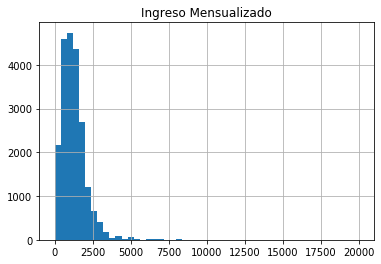

In [177]:
base_final["ingreso_mensual"].hist(bins=50).set_title("Ingreso Mensualizado")

In [178]:
base_final["nivel_educacion"].value_counts()

3.0    8874
2.0    5416
5.0    3025
4.0    2752
0.0     945
6.0     299
1.0       9
Name: nivel_educacion, dtype: int64

Text(0.5, 1.0, 'Nivel Educativo')

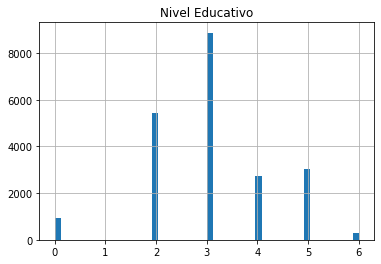

In [179]:
base_final["nivel_educacion"].hist(bins=50).set_title("Nivel Educativo")

Text(0.5, 1.0, 'Edad')

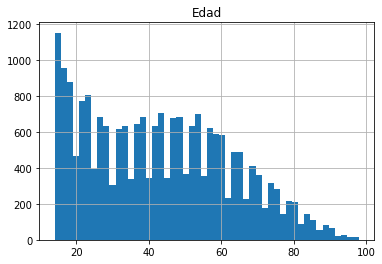

In [180]:
base_final["edad"].hist(bins=50).set_title("Edad")

Text(0.5, 1.0, 'Capacidad de estar comunicado')

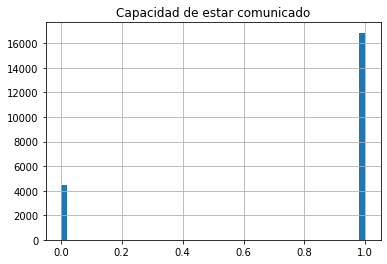

In [181]:
base_final["comunicacion"].hist(bins=50).set_title("Capacidad de estar comunicado")

Text(0.5, 1.0, 'Afiliado a seguro de salud')

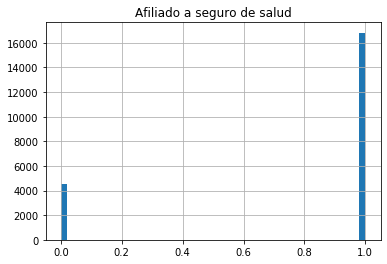

In [182]:
base_final["seguro"].hist(bins=50).set_title("Afiliado a seguro de salud")

Text(0.5, 1.0, 'Tiene DNI siendo mayor de 20 años)')

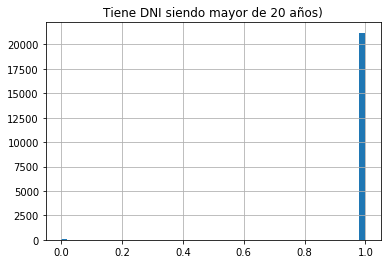

In [183]:
base_final["tiene_dni"].hist(bins=50).set_title("Tiene DNI siendo mayor de 20 años)")

Text(0.5, 1.0, 'Padece de algún malestar crónico')

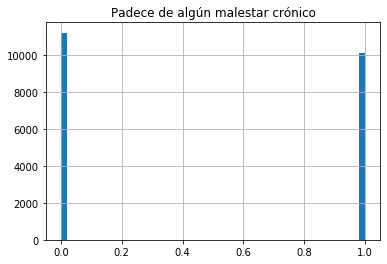

In [184]:
base_final["tiene_enfermedad"].hist(bins=50).set_title("Padece de algún malestar crónico")

Text(0.5, 1.0, 'Horas para llegar al centro de salud')

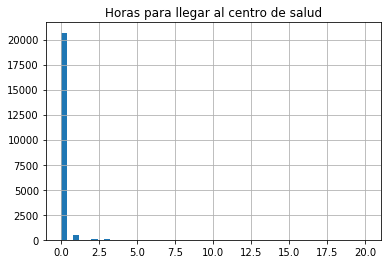

In [185]:
base_final["tiempo_salud"].hist(bins=50).set_title("Horas para llegar al centro de salud")

Text(0.5, 1.0, 'No acudió a un centro de salud por falta de dinero')

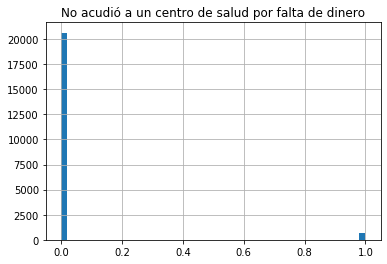

In [186]:
base_final["no_dinero"].hist(bins=50).set_title("No acudió a un centro de salud por falta de dinero")

## Matriz de correlación y gráfico boxplot

**PREGUNTA 5:** Una matriz de correlaciones de cada variable independiente continua contra la dependiente y un grafico boxplot para las variables categoricas.

**Matriz de correlación**

In [188]:
matrix_1 = base_final[['ingreso_mensual','fallecidos_dpto']]
corr_M1 = matrix_1.corr()
(corr_M1)

,ingreso_mensual,fallecidos_dpto
ingreso_mensual,1.000000,0.131277
fallecidos_dpto,0.131277,1.000000


In [189]:
matrix_3 = base_final[['edad','fallecidos_dpto']]
corr_M3 = matrix_3.corr()
(corr_M3)

,edad,fallecidos_dpto
edad,1.000000,0.009251
fallecidos_dpto,0.009251,1.000000


In [190]:
matrix_4=base_final[['tiempo_salud','fallecidos_dpto']]
corr_M4 = matrix_4.corr()
(corr_M4)

,tiempo_salud,fallecidos_dpto
tiempo_salud,1.000000,-0.001664
fallecidos_dpto,-0.001664,1.000000


**Boxplot**

Text(0.5, 1.0, 'Boxplot:Nivel de Educación')

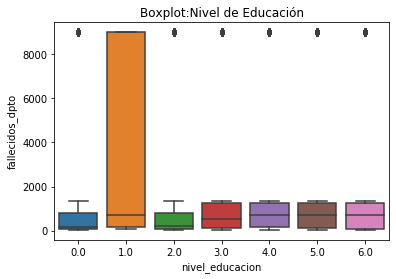

In [201]:
# Nivel de educacion 
sns.boxplot(y='fallecidos_dpto',x='nivel_educacion',data=base_final).set_title("Boxplot:Nivel de Educación")

Text(0.5, 1.0, 'Capacidad de estar comunicado')

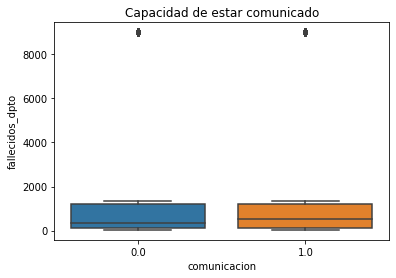

In [202]:
# Capacidad de estar comunicado
sns.boxplot(y='fallecidos_dpto',x='comunicacion',data=base_final).set_title("Capacidad de estar comunicado")

Text(0.5, 1.0, 'Afiliado a seguro de salud')

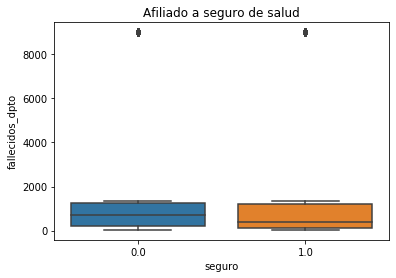

In [203]:
# Seguro de salud
sns.boxplot(y='fallecidos_dpto',x='seguro',data=base_final).set_title("Afiliado a seguro de salud")

Text(0.5, 1.0, 'Tiene DNI siendo mayor de 20 años)')

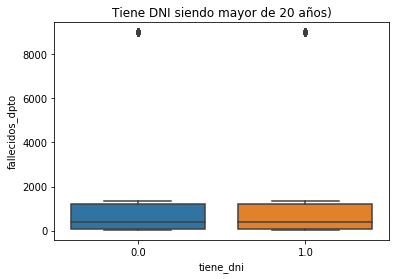

In [204]:
# DNI
sns.boxplot(y='fallecidos_dpto',x='tiene_dni',data=base_final).set_title("Tiene DNI siendo mayor de 20 años)")

Text(0.5, 1.0, 'Padece de algún malestar crónico')

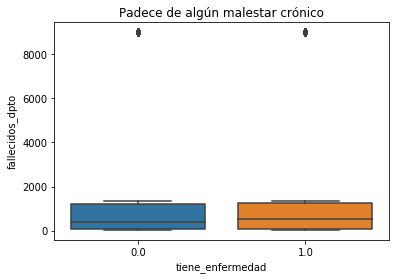

In [205]:
# Malestar cronico
sns.boxplot(y='fallecidos_dpto',x='tiene_enfermedad',data=base_final).set_title("Padece de algún malestar crónico")

## Modelo

In [241]:
base_dpto = base_final.groupby('departamento').agg({'ingreso_mensual':'median',
                                                    'nivel_educacion':'median',
                                                    'edad':'median',
                                                    'comunicacion':'median',
                                                    'seguro':'median',
                                                    'tiene_dni':'median',
                                                    'tiene_enfermedad':'median',
                                                    'tiempo_salud':'median',
                                                    'no_dinero':'median',
                                                    'fallecidos_dpto':'median'})
base_dpto.reset_index(inplace=True)
base_dpto.head(25)

,departamento,ingreso_mensual,nivel_educacion,edad,comunicacion,seguro,tiene_dni,tiene_enfermedad,tiempo_salud,no_dinero,fallecidos_dpto
0,AMAZONAS,836.0,3.0,40.0,1.0,1.0,1.0,1.0,0.0,0.0,124.0
1,ANCASH,1097.0,3.0,42.0,1.0,1.0,1.0,1.0,0.0,0.0,825.0
2,APURIMAC,988.0,3.0,45.0,1.0,1.0,1.0,1.0,0.0,0.0,38.0
3,AREQUIPA,1313.0,3.0,42.0,1.0,1.0,1.0,0.0,0.0,-0.0,726.0
4,AYACUCHO,868.5,3.0,41.0,1.0,1.0,1.0,0.0,0.0,0.0,74.0
5,CAJAMARCA,869.0,2.0,45.0,1.0,1.0,1.0,0.0,0.0,0.0,203.0
6,CALLAO,1352.5,3.0,41.0,1.0,1.0,1.0,1.0,0.0,0.0,1026.0
7,CUSCO,1060.5,3.0,42.0,1.0,1.0,1.0,0.0,0.0,0.0,82.0
8,HUANCAVELICA,893.0,3.0,42.0,1.0,1.0,1.0,0.0,0.0,0.0,38.0
9,HUANUCO,930.0,3.0,42.0,1.0,1.0,1.0,0.0,0.0,0.0,192.0


In [220]:
matrix = base_dpto[['ingreso_mensual','fallecidos_dpto']]
corr = matrix.corr()
(corr)

,ingreso_mensual,fallecidos_dpto
ingreso_mensual,1.000000,0.416791
fallecidos_dpto,0.416791,1.000000


In [242]:
modelacion, validacion = train_test_split(base_dpto, test_size = 0.30, random_state = 100) 
modelacion.shape, validacion.shape, validacion.columns

((17, 11),
 (8, 11),
 Index(['departamento', 'ingreso_mensual', 'nivel_educacion', 'edad',
        'comunicacion', 'seguro', 'tiene_dni', 'tiene_enfermedad',
        'tiempo_salud', 'no_dinero', 'fallecidos_dpto'],
       dtype='object'))

In [245]:
X = modelacion.drop(['departamento', 'fallecidos_dpto'], axis=1)
y = modelacion['fallecidos_dpto']

modelo1 = sm.OLS(y, X)
res1 = modelo1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:        fallecidos_dpto   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1.552
Date:                Mon, 03 Aug 2020   Prob (F-statistic):              0.248
Time:                        17:42:47   Log-Likelihood:                -151.27
No. Observations:                  17   AIC:                             310.5
Df Residuals:                      13   BIC:                             313.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ingreso_mensual      5.0321      2.707  

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  con

In [236]:
#base validacion
Xv = validacion.drop(['departamento', 'fallecidos_dpto'], axis=1)
yv = validacion['fallecidos_dpto']

modelovalidacion = sm.OLS(yv, Xv)
resvalid = modelovalidacion.fit()
print(resvalid.summary())

                            OLS Regression Results                            
Dep. Variable:        fallecidos_dpto   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     91.47
Date:                Mon, 03 Aug 2020   Prob (F-statistic):            0.00182
Time:                        17:39:09   Log-Likelihood:                -40.920
No. Observations:                   8   AIC:                             91.84
Df Residuals:                       3   BIC:                             92.24
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ingreso_mensual      2.5442      0.258  

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [238]:
#prediccion de fallecidos
prediccion=resvalid.predict(Xv)
validacion['fallecidos_predic']=prediccion
fallecidos_dpto=validacion['fallecidos_dpto']
validacion['fallecidos_dpto']=fallecidos_dpto
validacion[['fallecidos_dpto','fallecidos_predic']].head(25)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,fallecidos_dpto,fallecidos_predic
9,192.0,161.416715
22,33.0,5.251400
13,1216.0,1270.381945
11,408.0,429.827435
5,203.0,203.000000
19,1254.0,1176.247380
23,211.0,243.126525
21,342.0,369.748600


**PREGUNTA 8**
Error Cuadrático Medio

In [239]:
#error cuadratico medio
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(fallecidos_dpto, prediccion)
mse

1623.340399390296